<a href="https://colab.research.google.com/github/Goal48/NIFTY_Data_Analysis/blob/main/notebookb75ec1019a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
oneplustricks_nifty_50_20072021_path = kagglehub.dataset_download('oneplustricks/nifty-50-20072021')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-50-20072021/NSEI .csv


In [ ]:
df = pd.read_csv('/kaggle/input/nifty-50-20072021/NSEI .csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [ ]:
df.shape

(3353, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3353 non-null   object 
 1   Open       3318 non-null   float64
 2   High       3318 non-null   float64
 3   Low        3318 non-null   float64
 4   Close      3318 non-null   float64
 5   Adj Close  3318 non-null   float64
 6   Volume     3318 non-null   float64
dtypes: float64(6), object(1)
memory usage: 183.5+ KB


In [ ]:
df.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In the dataset Missing Values

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3.318000e+03
mean,7605.107718,7651.544607,7545.445626,7599.239017,7599.239017,1.804448e+05
std,2771.825727,2773.572240,2760.632696,2767.140530,2767.140530,2.231816e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5321.312378,5367.099976,5275.387451,5321.062622,5321.062622,0.000000e+00
50%,7412.400147,7469.875000,7361.850098,7409.925049,7409.925049,1.438500e+05
75%,9971.012451,10023.400146,9912.437256,9971.275391,9971.275391,2.335750e+05
max,15371.450195,15431.750000,15243.400391,15314.700195,15314.700195,1.811000e+06


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Rename columns if needed
df.columns = df.columns.str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

# Handle missing values
df = df.dropna()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


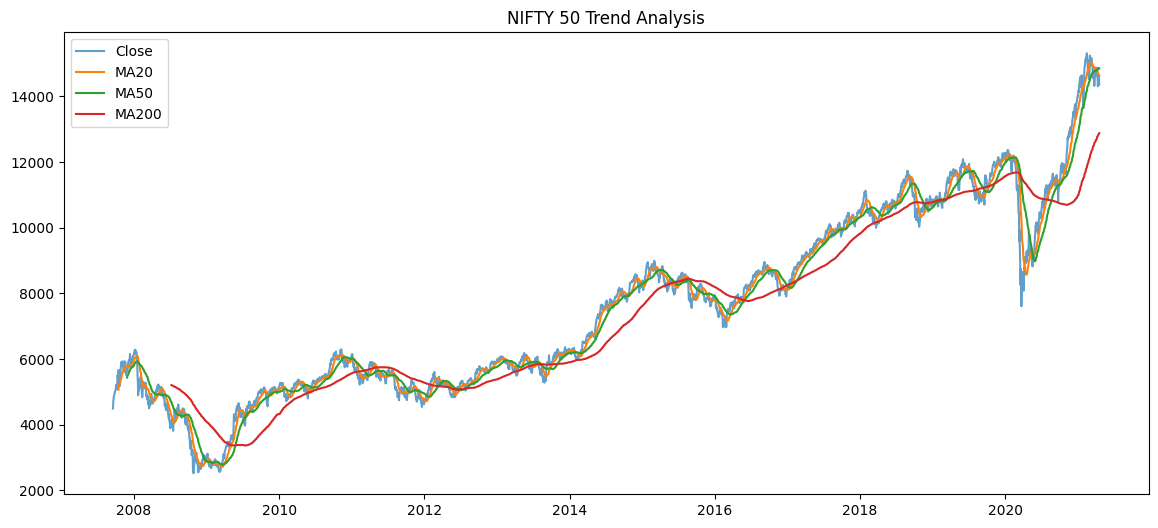

In [ ]:
# Moving Averages
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

# Plot trend
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.plot(df['Date'], df['MA200'], label='MA200')
plt.legend()
plt.title('NIFTY 50 Trend Analysis')
plt.show()


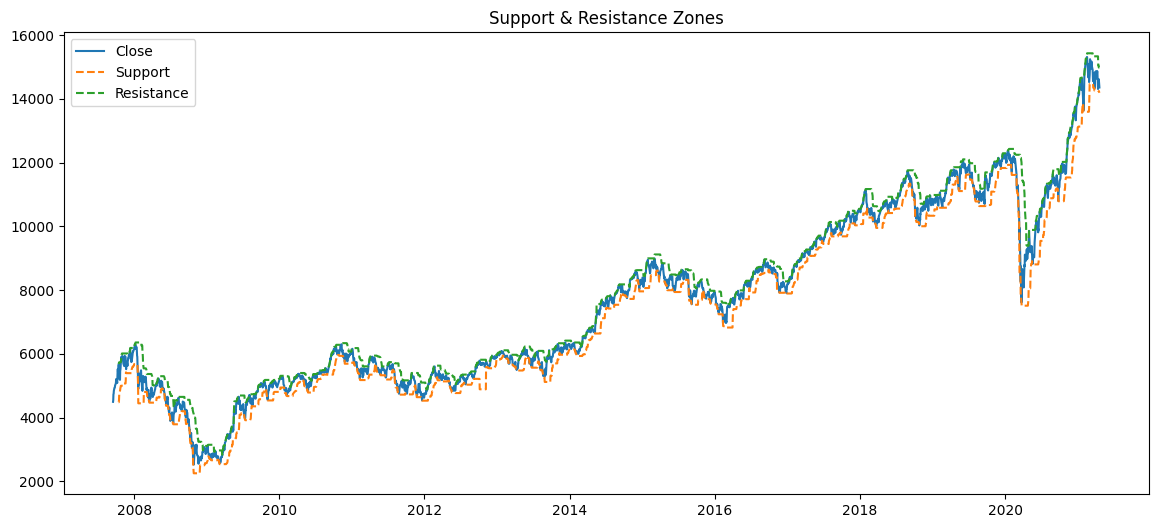

In [ ]:
# Rolling support & resistance
df['Support'] = df['Low'].rolling(20).min()
df['Resistance'] = df['High'].rolling(20).max()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Support'], linestyle='--', label='Support')
plt.plot(df['Date'], df['Resistance'], linestyle='--', label='Resistance')
plt.legend()
plt.title('Support & Resistance Zones')
plt.show()


In [ ]:
# Daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Rolling volatility (20 days)
df['Volatility'] = df['Daily_Return'].rolling(20).std()

# ATR
df['High-Low'] = df['High'] - df['Low']
df['High-Close'] = abs(df['High'] - df['Close'].shift())
df['Low-Close'] = abs(df['Low'] - df['Close'].shift())

df['TR'] = df[['High-Low','High-Close','Low-Close']].max(axis=1)
df['ATR'] = df['TR'].rolling(14).mean()

df[['Volatility','ATR']].dropna().head()


,Volatility,ATR
20,0.018438,145.685652
21,0.019700,182.132080
22,0.021036,210.078509
23,0.022199,226.489258
24,0.022071,232.814279


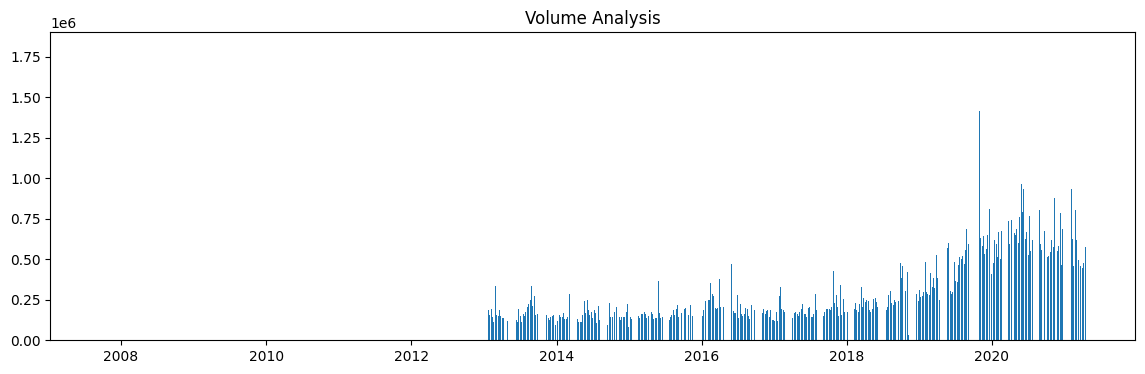

,Daily_Return,Volume_Change
Daily_Return,1.000000,-0.018869
Volume_Change,-0.018869,1.000000


In [ ]:
plt.figure(figsize=(14,4))
plt.bar(df['Date'], df['Volume'])
plt.title('Volume Analysis')
plt.show()

# Volume vs return
df['Volume_Change'] = df['Volume'].pct_change()

df[['Daily_Return','Volume_Change']].corr()


In [ ]:
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))


In [ ]:
df['EMA12'] = df['Close'].ewm(span=12).mean()
df['EMA26'] = df['Close'].ewm(span=26).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9).mean()


In [ ]:
# Cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# Drawdown
df['Peak'] = df['Cumulative_Return'].cummax()
df['Drawdown'] = (df['Cumulative_Return'] - df['Peak']) / df['Peak']

max_drawdown = df['Drawdown'].min()
max_drawdown


-0.5985591399828563

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,MA200,...,ATR,Volume_Change,RSI,EMA12,EMA26,MACD,Signal,Cumulative_Return,Peak,Drawdown
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4494.649902,4494.649902,0.000000,0.000000,NaN,NaN,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4522.572977,4521.416400,1.156577,0.642543,1.011469,1.011469,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4604.449036,4597.202830,7.246206,3.348962,1.052885,1.052885,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4649.620356,4639.233274,10.387082,5.733149,1.056267,1.056267,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4700.680116,4685.223696,15.456420,8.625603,1.076291,1.076291,0.0
